# Clustering

In [157]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

dfmar = pd.read_csv('D2_mar.csv', na_filter=False)
dfmar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   residual_transmission               102 non-null    float64
 1   regulatable_transmission            102 non-null    float64
 2   recovery_rate                       102 non-null    float64
 3   detection_rate                      102 non-null    float64
 4   death_rate                          102 non-null    float64
 5   response_slope                      102 non-null    float64
 6   initial_relative_latent_infections  102 non-null    float64
 7   response_weights                    102 non-null    float64
 8   Country                             102 non-null    object 
dtypes: float64(8), object(1)
memory usage: 7.3+ KB


In [158]:
dfapr = pd.read_csv('D2_apr.csv', na_filter=False)
dfapr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   residual_transmission               118 non-null    float64
 1   regulatable_transmission            118 non-null    float64
 2   recovery_rate                       118 non-null    float64
 3   detection_rate                      118 non-null    float64
 4   death_rate                          118 non-null    float64
 5   response_slope                      118 non-null    float64
 6   initial_relative_latent_infections  118 non-null    float64
 7   response_weights                    118 non-null    float64
 8   Country                             118 non-null    object 
dtypes: float64(8), object(1)
memory usage: 8.4+ KB


In [159]:
print(dfmar['residual_transmission'].describe())
print(dfmar['residual_transmission'].value_counts())
print(dfmar['residual_transmission'].unique())

count    102.000000
mean       0.197575
std        0.162790
min        0.000000
25%        0.109152
50%        0.154607
75%        0.207843
max        1.000000
Name: residual_transmission, dtype: float64
0.000000    1
0.131860    1
0.562484    1
0.121961    1
0.101053    1
           ..
0.108155    1
0.072437    1
0.270294    1
0.098584    1
0.149866    1
Name: residual_transmission, Length: 102, dtype: int64
[0.08207399 0.56248363 0.15593951 0.2237704  0.1252257  0.10489843
 0.20681815 0.278832   0.05975336 0.09505909 0.1727443  0.14986571
 0.15518801 0.07243741 0.13854988 0.55971611 0.1832737  0.04282223
 0.06826482 0.26538302 0.02343386 0.13673085 0.06016271 0.19975132
 0.15186753 0.13865893 0.10612187 0.14728981 0.14044263 0.68652583
 0.13862476 0.12219168 0.63588412 0.19544625 0.18875997 0.16387918
 0.19072952 0.1205612  0.06330233 0.18995499 0.11608947 0.19810932
 0.16818963 0.20931955 0.62759193 0.27628106 0.22060851 0.27029366
 0.31147581 0.1167561  0.19340334 0.08964003 1.    

In [160]:
print(dfmar['regulatable_transmission'].describe())
print(dfmar['regulatable_transmission'].value_counts())
print(dfmar['regulatable_transmission'].unique())

count    102.000000
mean       0.189662
std        0.141508
min        0.000000
25%        0.114929
50%        0.147812
75%        0.211925
max        1.000000
Name: regulatable_transmission, dtype: float64
0.000000    1
0.199806    1
0.198417    1
0.133738    1
0.225716    1
           ..
0.222403    1
0.114082    1
0.211944    1
0.084134    1
0.142077    1
Name: regulatable_transmission, Length: 102, dtype: int64
[0.16589837 0.45503737 0.11408169 0.05764624 0.17561868 0.10962957
 0.11427333 0.16394072 0.06003548 0.17597533 0.09161307 0.07131176
 0.24316335 0.09815061 0.19307012 0.42052882 0.48577679 0.11262686
 0.1620973  0.22571642 0.19841692 0.19750627 0.16199616 0.12771896
 0.         0.0801382  0.21564848 0.12739712 0.12398422 0.52814423
 0.23166596 0.23288453 0.40605747 0.22006743 0.08818257 0.11882044
 0.26837089 0.12612491 0.20585487 0.13269397 0.12762724 0.1063952
 0.14324631 0.08561931 0.49715749 0.17437882 0.11380449 0.17273932
 0.12082642 0.11760965 0.17496886 0.01937797 0

In [161]:
print(dfapr['residual_transmission'].describe())
print(dfapr['residual_transmission'].value_counts())
print(dfapr['residual_transmission'].unique())

count    118.000000
mean       0.264999
std        0.149130
min        0.000000
25%        0.173059
50%        0.258072
75%        0.334805
max        1.000000
Name: residual_transmission, dtype: float64
0.000000    1
0.265084    1
0.260531    1
0.236650    1
0.251081    1
           ..
0.838552    1
0.298005    1
0.258239    1
0.275511    1
0.312709    1
Name: residual_transmission, Length: 118, dtype: int64
[0.13196331 0.11654032 0.30955022 0.30874554 0.40264952 0.35557468
 0.26508399 0.35855242 0.1323395  0.3408729  0.2299442  0.32673011
 0.25794529 0.21709925 0.13710647 0.33459179 0.20832709 0.25823918
 0.39743994 0.24025167 0.20449941 0.16442161 0.10868629 0.16565479
 0.15271638 0.06308092 0.23025808 0.8757808  0.30326617 0.04815696
 0.83855202 0.         0.35786294 0.33592078 0.2573863  0.29800487
 0.312709   0.19963193 0.18143986 0.35104635 0.23412749 0.27551136
 0.39280053 0.09450411 0.25920904 0.26171067 0.42680941 0.16585111
 0.2366497  0.33487569 0.26053097 0.43997588 0.1861

In [162]:
#Drop columns that not in use
dfmar.drop('response_slope', inplace=True, axis=1)
dfmar.drop('initial_relative_latent_infections', inplace=True, axis=1)
dfmar.drop('response_weights', inplace=True, axis=1)
dfmar.drop('Country', inplace=True, axis=1)

dfapr.drop('response_slope', inplace=True, axis=1)
dfapr.drop('initial_relative_latent_infections', inplace=True, axis=1)
dfapr.drop('response_weights', inplace=True, axis=1)
dfapr.drop('Country', inplace=True, axis=1)

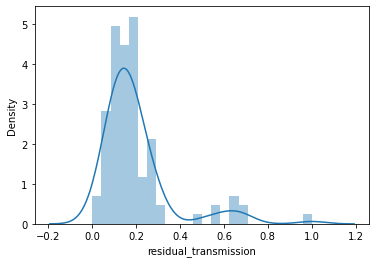

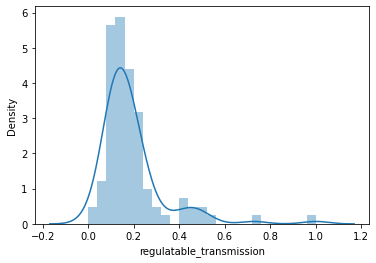

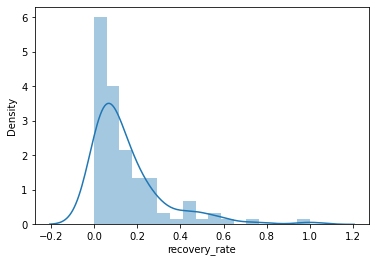

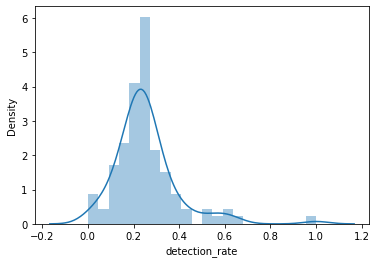

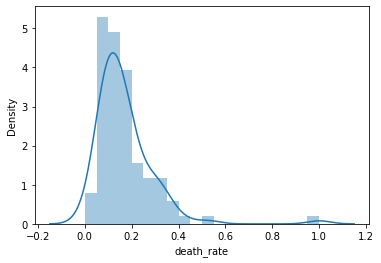

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of residual_transmission
residual_transmission_dist = sns.distplot(dfmar['residual_transmission'].dropna())
plt.show()

# Distribution of regulatable_transmission
regulatable_transmission_dist = sns.distplot(dfmar['regulatable_transmission'].dropna())
plt.show()

# Distribution of recovery_rate
recovery_rate_dist = sns.distplot(dfmar['recovery_rate'].dropna())
plt.show()

# Distribution of detection_rate
detection_rate_dist = sns.distplot(dfmar['detection_rate'].dropna())
plt.show()

# Distribution of death_rate
death_rate_dist = sns.distplot(dfmar['death_rate'].dropna())
plt.show()


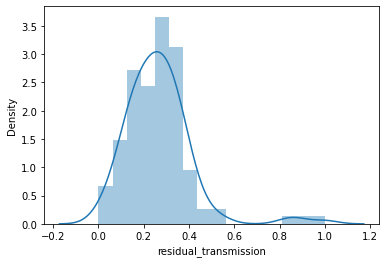

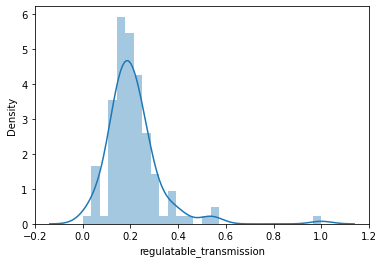

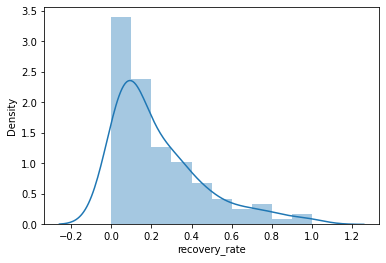

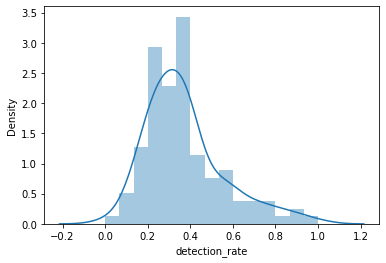

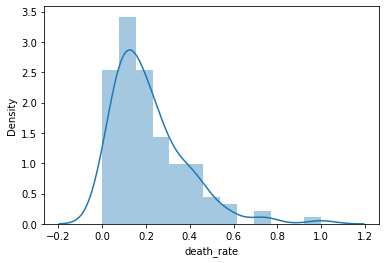

In [164]:
# Distribution of residual_transmission
residual_transmission_dist = sns.distplot(dfapr['residual_transmission'].dropna())
plt.show()

# Distribution of regulatable_transmission
regulatable_transmission_dist = sns.distplot(dfapr['regulatable_transmission'].dropna())
plt.show()

# Distribution of recovery_rate
recovery_rate_dist = sns.distplot(dfapr['recovery_rate'].dropna())
plt.show()

# Distribution of detection_rate
detection_rate_dist = sns.distplot(dfapr['detection_rate'].dropna())
plt.show()

# Distribution of death_rate
death_rate_dist = sns.distplot(dfapr['death_rate'].dropna())
plt.show()

In [165]:
len(dfmar)

102

In [166]:
len(dfapr)

118

In [167]:
print(dfmar.info())
print(dfapr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   residual_transmission     102 non-null    float64
 1   regulatable_transmission  102 non-null    float64
 2   recovery_rate             102 non-null    float64
 3   detection_rate            102 non-null    float64
 4   death_rate                102 non-null    float64
dtypes: float64(5)
memory usage: 4.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   residual_transmission     118 non-null    float64
 1   regulatable_transmission  118 non-null    float64
 2   recovery_rate             118 non-null    float64
 3   detection_rate            118 non-null    float64
 4   death_rate                1

In [168]:
# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2,8,1):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=-1)
    model.fit(Xmar)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

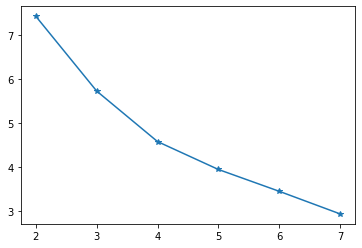

In [169]:
# plot the cost vs K values in Mar dataset
plt.plot(range(2,8,1), inertia_vals, marker='*')
plt.show()

In [170]:
# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 8, 1):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=-1)
    model.fit(Xapr)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

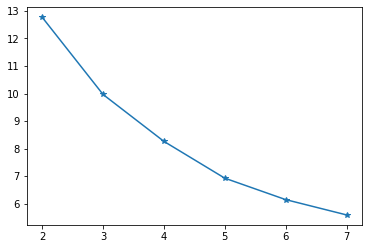

In [171]:
# plot the cost vs K values in Apr dataset
plt.plot(range(2,8,1), inertia_vals, marker='*')
plt.show()

In [258]:
from sklearn.metrics import silhouette_score

print("------------------k for mar-----------------------")
print(clusters[1])
print("Silhouette score for k=3", silhouette_score(Xmar, clusters[1].predict(Xmar)))

print(clusters[2])
print("Silhouette score for k=4", silhouette_score(Xmar, clusters[2].predict(Xmar)))

print(clusters[3])
print("Silhouette score for k=5", silhouette_score(Xmar, clusters[2].predict(Xmar)))

print("-------------------k for apr-----------------------")

print(clusters[1])
print("Silhouette score for k=3", silhouette_score(Xapr, clusters[1].predict(Xapr)))

print(clusters[2])
print("Silhouette score for k=4", silhouette_score(Xapr, clusters[2].predict(Xapr)))

print(clusters[3])
print("Silhouette score for k=5", silhouette_score(Xapr, clusters[2].predict(Xapr)))

------------------k for mar-----------------------
KMeans(n_clusters=3, n_jobs=-1, random_state=42)
Silhouette score for k=3 0.493125554089857
KMeans(n_clusters=4, n_jobs=-1, random_state=42)
Silhouette score for k=4 0.42165315825946476
KMeans(n_clusters=5, n_jobs=-1, random_state=42)
Silhouette score for k=5 0.42165315825946476
-------------------k for apr-----------------------
KMeans(n_clusters=3, n_jobs=-1, random_state=42)
Silhouette score for k=3 0.3680441529829183
KMeans(n_clusters=4, n_jobs=-1, random_state=42)
Silhouette score for k=4 0.36329730623258666
KMeans(n_clusters=5, n_jobs=-1, random_state=42)
Silhouette score for k=5 0.36329730623258666


In [173]:
pip install kmeans

Note: you may need to restart the kernel to use updated packages.


In [252]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

# take 3 variables and drop the rest
dfmar2 = dfmar[['residual_transmission','regulatable_transmission','recovery_rate', 'detection_rate', 'death_rate']]
# convert df2 to matrix
Xmar = dfmar2.to_numpy()
# scaling
#scaler = StandardScaler()
#Xmar = scaler.fit_transform(Xmar)

In [259]:
from sklearn.cluster import KMeans

# random state, we will use 42 instead of 10 for a change
rs = 42

# set the random state. different random state seeds might result in different centroids locations
model = KMeans(n_clusters=3, random_state=rs)
model.fit(Xmar)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 5.734717540085727
Centroid locations:
[0.65810717 0.46840429 0.26328665 0.06049411 0.38671254]
[0.14992632 0.1464584  0.0882657  0.24617817 0.13759668]
[0.16678002 0.23523785 0.38486256 0.39784781 0.19443021]


Cluster membership
1    76
2    17
0     9
Name: Cluster_ID, dtype: int64


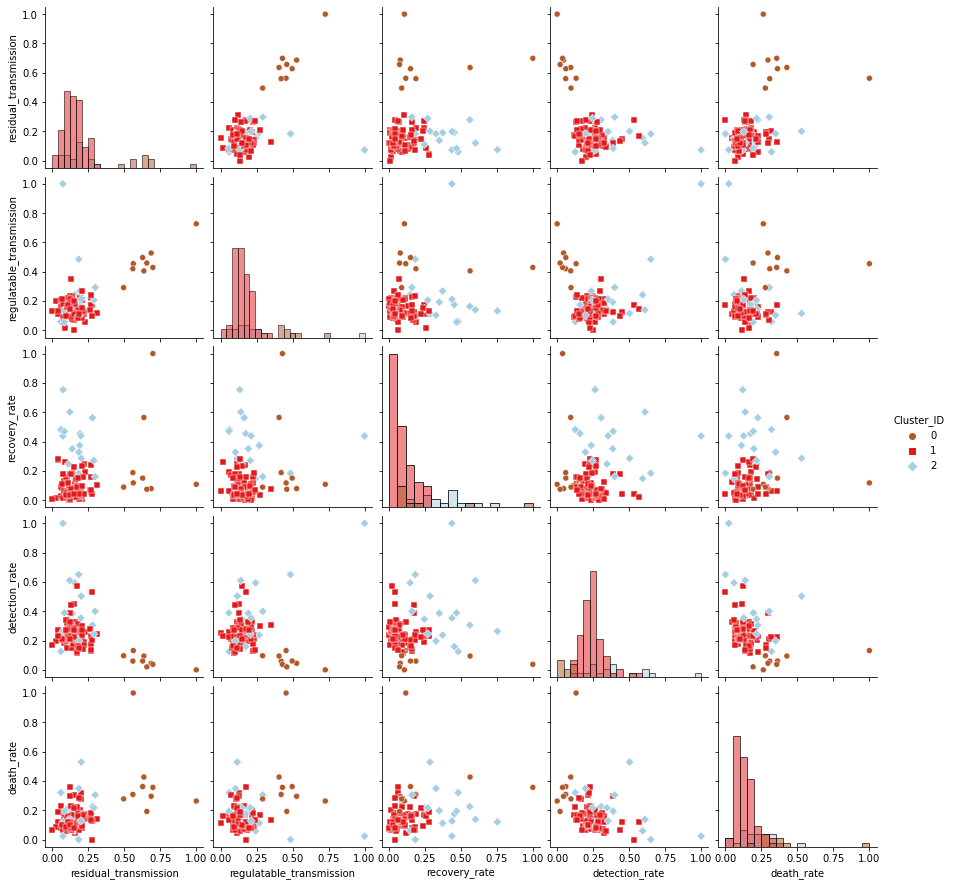

In [260]:
model = KMeans(n_clusters=3, random_state=rs).fit(Xmar)

# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
ymar = model.predict(Xmar)
dfmar2['Cluster_ID'] = ymar

# how many records are in each cluster
print("Cluster membership")
print(dfmar2['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(dfmar2, hue='Cluster_ID',diag_kind='hist', palette="Paired_r", markers=["o", "s", "D"])
plt.show()

In [213]:
from sklearn.preprocessing import StandardScaler
# take 3 variables and drop the rest
dfapr2 = dfapr[['residual_transmission','regulatable_transmission','recovery_rate', 'detection_rate', 'death_rate']]
# convert df2 to matrix
Xapr = dfapr2.to_numpy()
# scaling
#scaler = StandardScaler()
#Xapr = scaler.fit_transform(Xapr)

In [214]:
from sklearn.cluster import KMeans

# random state, we will use 42 instead of 10 for a change
rs = 42

# set the random state. different random state seeds might result in different centroids locations
model = KMeans(n_clusters=3, random_state=rs)
model.fit(Xapr)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 9.966122771726681
Centroid locations:
[0.35951036 0.20635465 0.57535795 0.31398415 0.39101974]
[0.22498561 0.18680477 0.12857377 0.303165   0.2114157 ]
[0.33326521 0.31696083 0.32342154 0.69950904 0.06687777]


Cluster membership
1    79
2    20
0    19
Name: Cluster_ID, dtype: int64


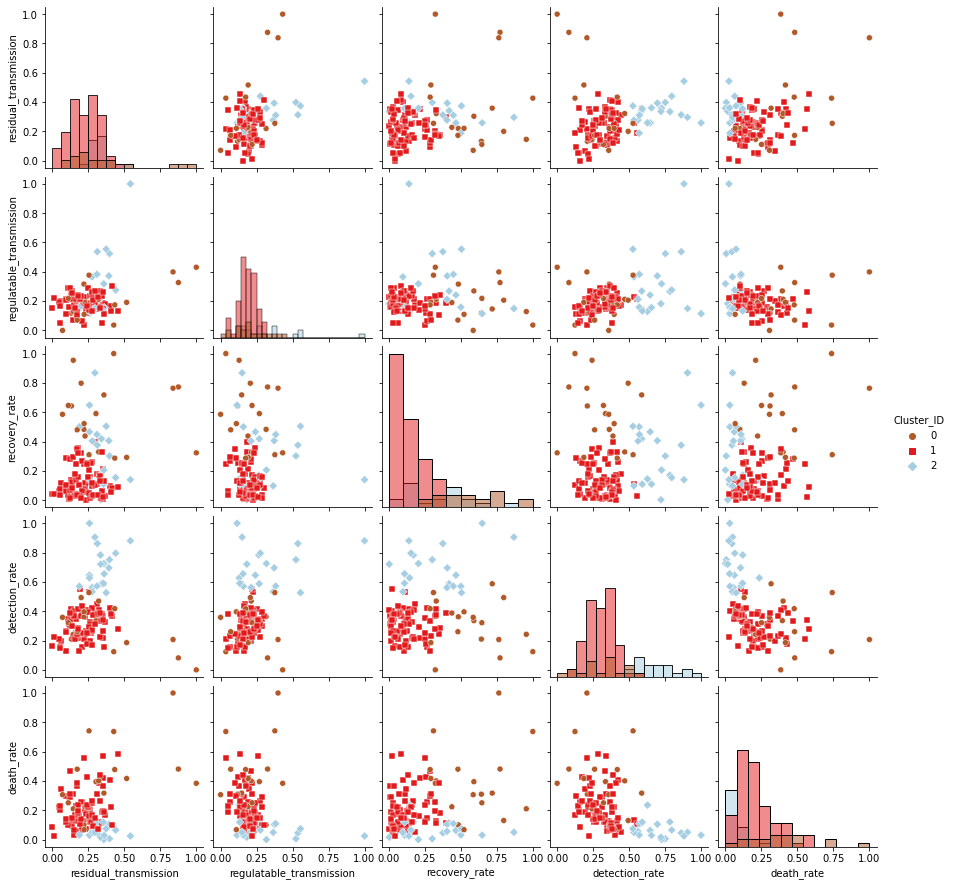

In [234]:
model = KMeans(n_clusters=3, random_state=rs).fit(Xapr)

# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
yapr = model.predict(Xapr)
dfapr2['Cluster_ID'] = yapr

# how many records are in each cluster
print("Cluster membership")
print(dfapr2['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(dfapr2, hue='Cluster_ID',diag_kind='hist', palette="Paired_r", markers=["o", "s", "D"])
plt.show()

Distribution for cluster 0


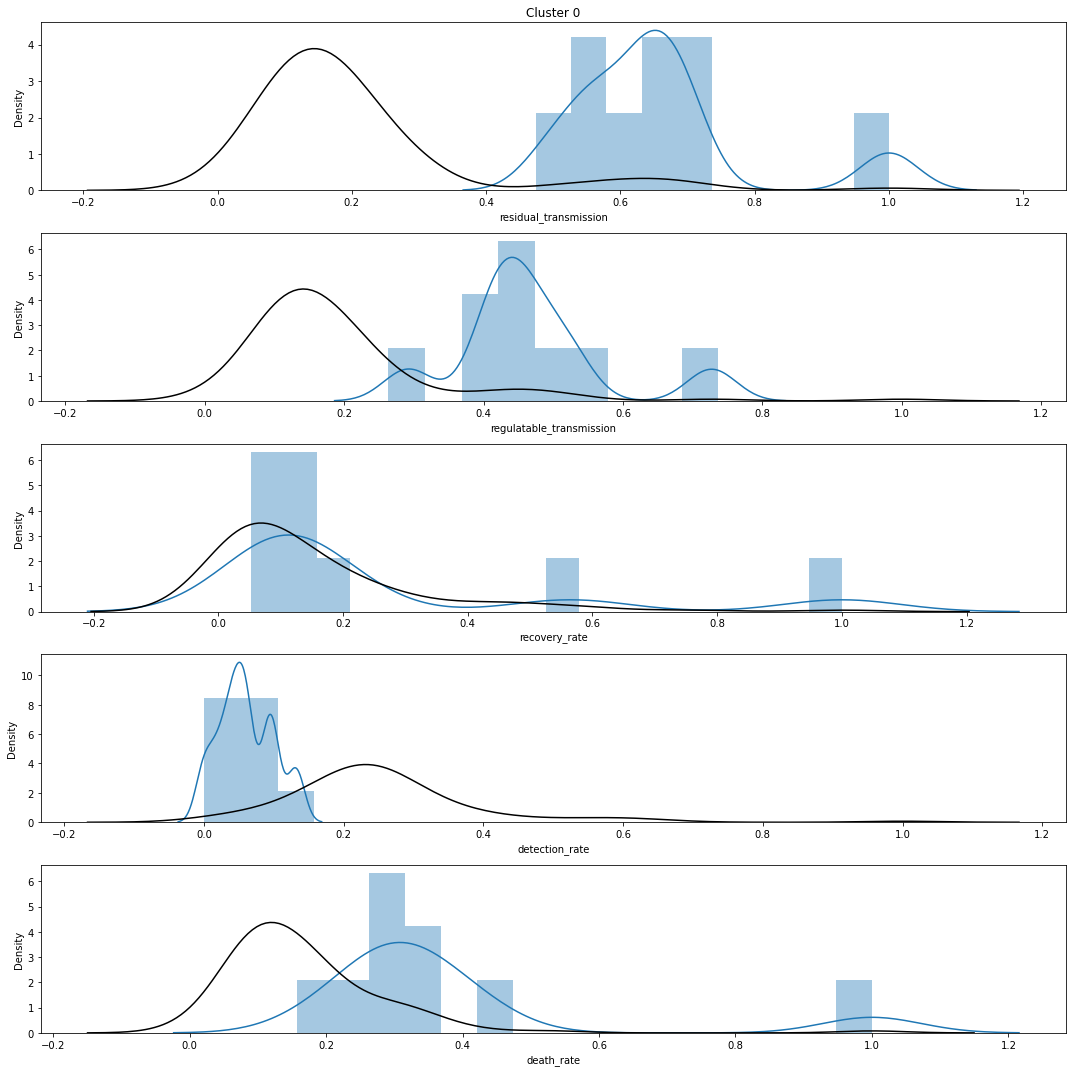

Distribution for cluster 1


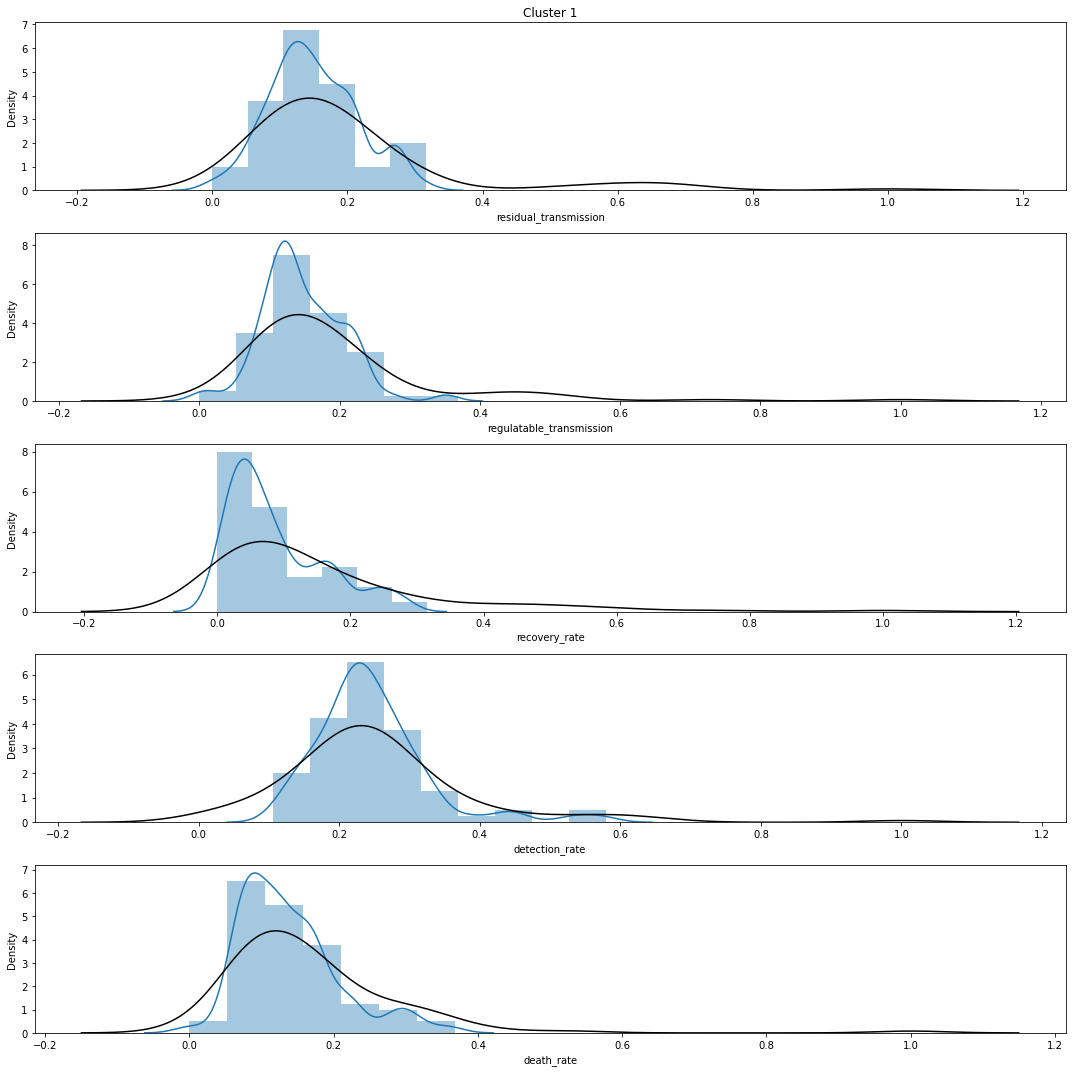

Distribution for cluster 2


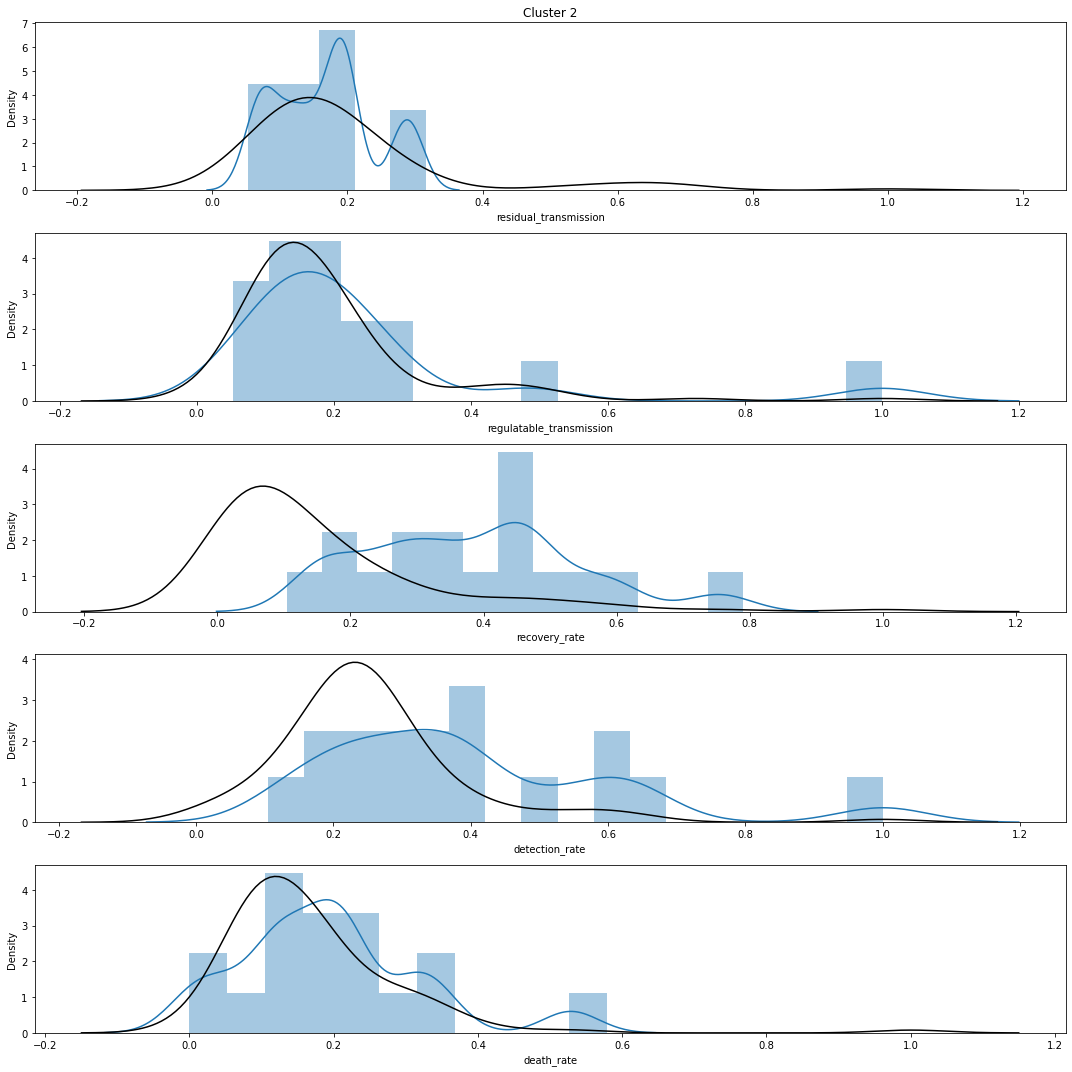

In [261]:
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['residual_transmission', 'regulatable_transmission', 'recovery_rate', 'detection_rate', 'death_rate']
n_bins = 20


clusters_to_inspect = [0,1,2]

for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))
    
    #create subplots
    fig, ax = plt.subplots(nrows=5, figsize = (15, 15))
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        bins = np.linspace(min(dfmar2[col]), max(dfmar2[col]), 20)
        sns.distplot(dfmar2[dfmar2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True, kde_kws={'bw':0.3})
        sns.distplot(dfmar2[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

Distribution for cluster 0


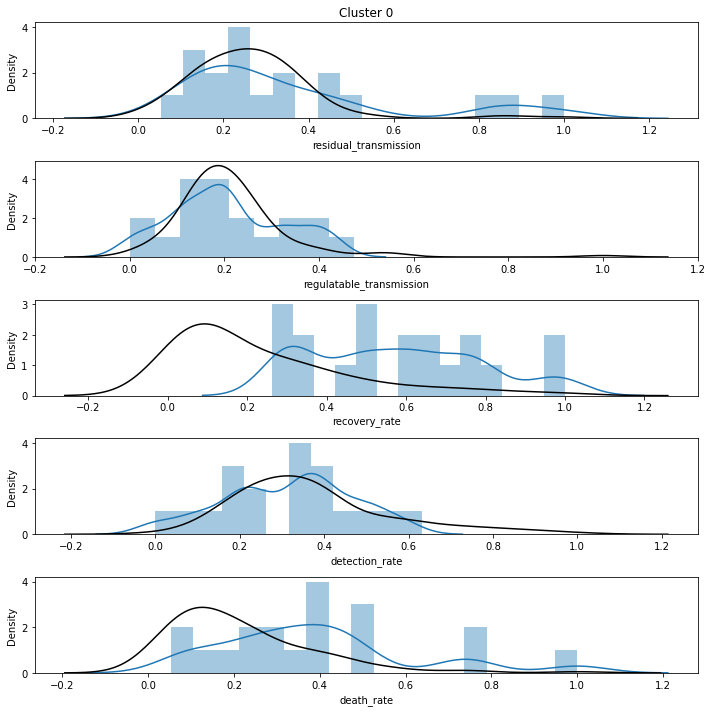

Distribution for cluster 1


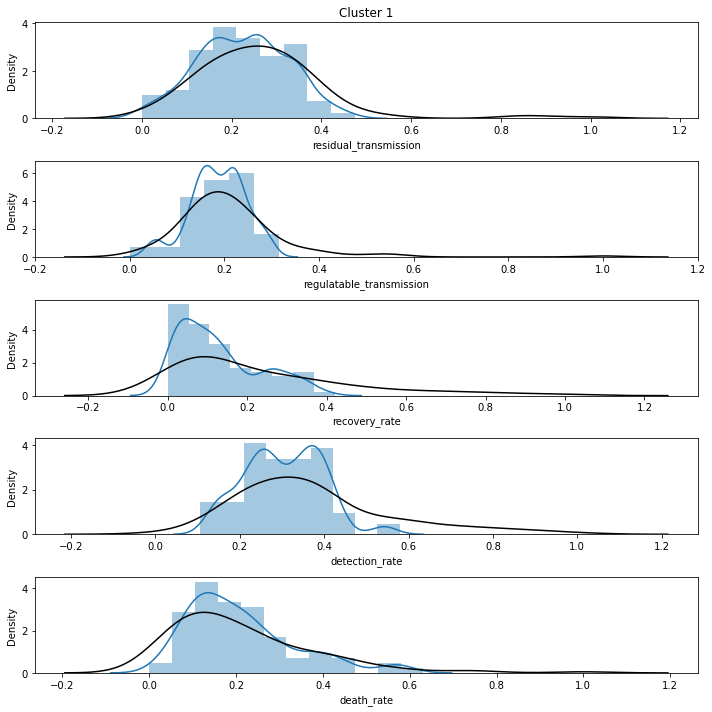

Distribution for cluster 2


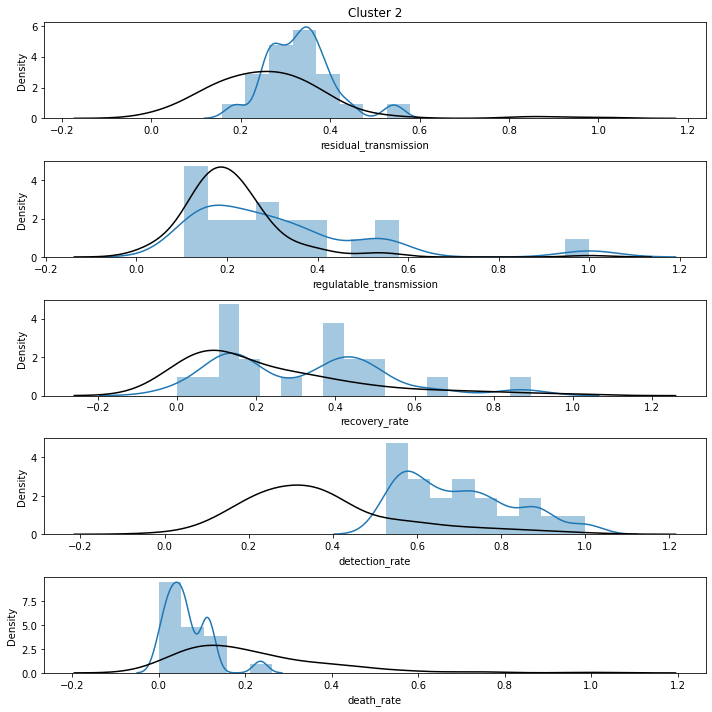

In [251]:
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['residual_transmission', 'regulatable_transmission', 'recovery_rate', 'detection_rate', 'death_rate']
n_bins = 20


clusters_to_inspect = [0,1,2]

for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))
    
    #create subplots
    fig, ax = plt.subplots(nrows=5, figsize = (10, 10))
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        bins = np.linspace(min(dfapr2[col]), max(dfapr2[col]), 20)
        sns.distplot(dfapr2[dfapr2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True, kde_kws={'bw':0.3})
        sns.distplot(dfapr2[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()